Don't run all cells on this notebook; different analyses are separated by headers. If you run all it'll scrape Zillow and I don't have permission for >1000 requests yet.

# Analyzing Zillow Neighborhood Data

In [26]:
#import libraries
import pandas
from matplotlib import pyplot

In [9]:
#get data
allData = pandas.read_csv('Neighborhood_Zri_AllHomesPlusMultifamily_Summary.csv')
data = allData[allData['Metro'] == 'Boston']

In [10]:
#print data
data

,Date,RegionName,State,Metro,County,City,SizeRank,Zri,MoM,QoQ,YoY,ZriRecordCnt
104,2017-10-31,South Dorchester,MA,Boston,Suffolk,Boston,104,2395,0.002092,-0.007871,0.039497,13142
154,2017-10-31,Roxbury,MA,Boston,Suffolk,Boston,154,2494,0.001204,-0.006375,0.031858,6965
221,2017-10-31,East Boston,MA,Boston,Suffolk,Boston,221,2396,0.005455,0.006723,0.027444,7677
237,2017-10-31,Jamaica Plain,MA,Boston,Suffolk,Boston,237,2644,0.000000,-0.001888,0.025204,12074
248,2017-10-31,Brighton,MA,Boston,Suffolk,Boston,248,2449,0.001226,0.003277,0.034206,18350
279,2017-10-31,Mattapan,MA,Boston,Suffolk,Boston,279,2333,0.005603,-0.004268,0.025945,5959
286,2017-10-31,South Boston,MA,Boston,Suffolk,Boston,286,2823,0.005700,0.007495,0.027667,14948
308,2017-10-31,Hyde Park,MA,Boston,Suffolk,Boston,308,2437,0.009110,0.017537,0.033065,8375
321,2017-10-31,Roslindale,MA,Boston,Suffolk,Boston,321,2431,0.003716,0.003302,0.030521,8673
355,2017-10-31,West Roxbury,MA,Boston,Suffolk,Boston,355,2535,0.007552,0.012380,0.038509,10488


Zri = Zillow Rental Index https://www.zillow.com/research/zillow-rent-index-methodology-2393/<br>
MoM = month over month <br>
YoY = year over year <br>
QoQ = quarter over quarter

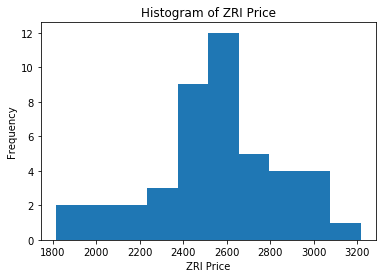

In [27]:
#create histogram of prices
pyplot.hist(data['Zri'],
            bins='auto')
pyplot.title('Histogram of ZRI Price')
pyplot.xlabel('ZRI Price')
pyplot.ylabel('Frequency')
pyplot.show()

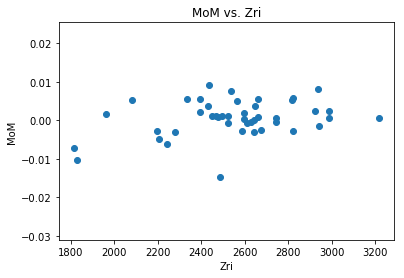

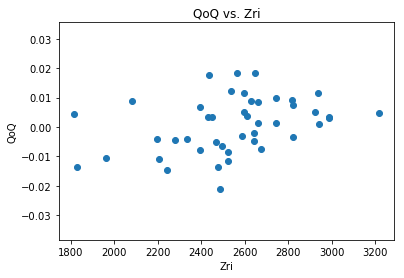

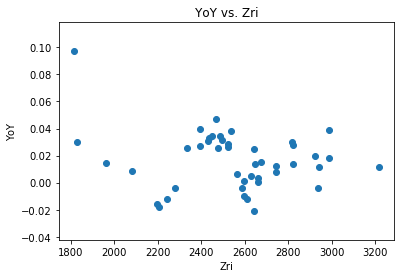

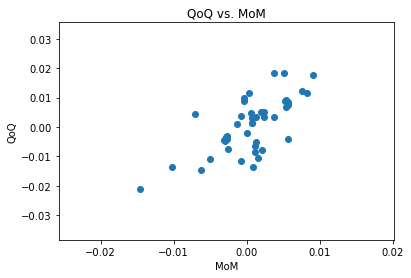

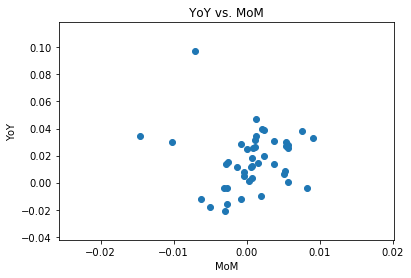

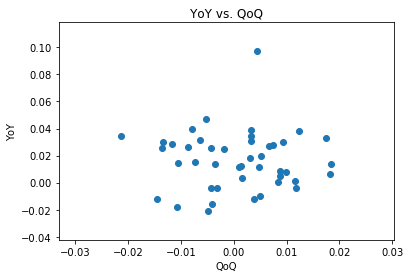

In [31]:
#make more plots
def varPlot(indVar, depVar):
    pyplot.scatter(data[indVar], data[depVar])
    pyplot.title(depVar + ' vs. ' + indVar)
    pyplot.xlabel(indVar)
    pyplot.ylabel(depVar)
    pyplot.show()
    
varPlot('Zri', 'MoM')
varPlot('Zri', 'QoQ')
varPlot('Zri', 'YoY')
varPlot('MoM', 'QoQ')
varPlot('MoM', 'YoY')
varPlot('QoQ', 'YoY')

None of the above relationships look very interesting to me. Anyone else have thoughts?

# ZRI Time Series

In [53]:
#import libraries
import pandas
import numpy
from matplotlib import pyplot
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn import metrics
from seaborn import heatmap

In [54]:
#get data
allData = pandas.read_csv('Neighborhood_Zri_AllHomesPlusMultifamily.csv')
data = allData[allData['City'] == 'Boston']

In [55]:
#print data
data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,...,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
104,275424,South Dorchester,Boston,MA,Boston,Suffolk,105,1462.0,1478.0,1495.0,...,2352,2377,2408,2428,2436,2428,2414,2398,2390,2395
154,54232,Roxbury,Boston,MA,Boston,Suffolk,155,1448.0,1463.0,1508.0,...,2449,2473,2503,2521,2532,2521,2510,2496,2491,2494
221,154399,East Boston,Boston,MA,Boston,Suffolk,222,1994.0,1947.0,1860.0,...,2354,2364,2379,2395,2398,2390,2380,2375,2383,2396
237,154795,Jamaica Plain,Boston,MA,Boston,Suffolk,238,1547.0,1591.0,1641.0,...,2620,2631,2637,2645,2651,2651,2649,2643,2644,2644
248,37575,Brighton,Boston,MA,Boston,Suffolk,249,2128.0,2098.0,2058.0,...,2366,2390,2422,2448,2457,2448,2441,2441,2446,2449
279,154970,Mattapan,Boston,MA,Boston,Suffolk,280,1472.0,1496.0,1512.0,...,2320,2329,2342,2355,2365,2357,2343,2326,2320,2333
286,155633,South Boston,Boston,MA,Boston,Suffolk,287,1679.0,1703.0,1760.0,...,2803,2817,2821,2819,2814,2810,2802,2800,2807,2823
308,154775,Hyde Park,Boston,MA,Boston,Suffolk,309,1521.0,1539.0,1576.0,...,2384,2382,2378,2392,2402,2401,2395,2393,2415,2437
321,155506,Roslindale,Boston,MA,Boston,Suffolk,322,1520.0,1536.0,1576.0,...,2421,2441,2451,2452,2445,2433,2423,2414,2422,2431
355,155995,West Roxbury,Boston,MA,Boston,Suffolk,356,1542.0,1565.0,1620.0,...,2512,2532,2540,2540,2532,2514,2504,2499,2516,2535


In [56]:
#get lat / long
latitude = [42.2913,
            42.3152,
            42.3702,
            42.3097,
            42.3464,
            42.2771,
            42.3381,
            42.2565,
            42.2832,
            42.2798,
            42.3388,
            42.3148,
            42.3539,
            42.3394,
            42.3503,
            42.3782,
            42.3490,
            42.3296,
            42.3647,
            42.3588,
            42.3501,
            42.3644,
            42.3555,
            42.3490]
longitude = [71.0605,
             71.0914,
             71.0389,
             71.1151,
             71.1627,
             71.0914,
             71.0476,
             71.1241,
             71.1270,
             71.1627,
             71.0765,
             71.0587,
             71.1337,
             71.0940,
             71.0810,
             71.0602,
             71.0975,
             71.1062,
             71.0542,
             71.0707,
             71.0624,
             71.0661,
             71.0594,
             71.0698]
data['Latitude'] = latitude
data['Longitude'] = longitude

C:\Users\StuBab\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\StuBab\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [57]:
#get time series
timeSeries = data.drop(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'Latitude', 'Longitude'], axis=1)
timeSeries.index = numpy.arange(0, len(timeSeries.index))

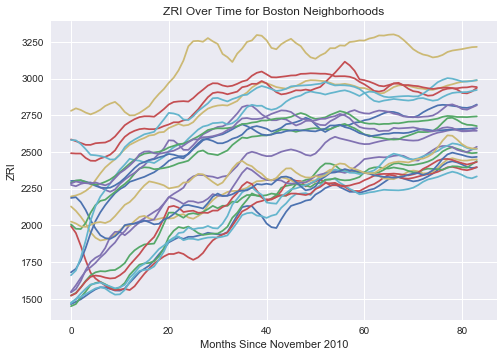

In [58]:
#plot time series
months = numpy.arange(0, len(timeSeries.columns))
for i in range(0, len(timeSeries.index)):
    pyplot.plot(months,
                timeSeries.iloc[i])
pyplot.title('ZRI Over Time for Boston Neighborhoods')
pyplot.xlabel('Months Since November 2010')
pyplot.ylabel('ZRI')
pyplot.show()

In [59]:
#normalize time series
unNormTimeSeries = timeSeries
for i in range(0, len(timeSeries.index)):
    timeSeries.iloc[i] = timeSeries.iloc[i]/timeSeries.iloc[i][0]

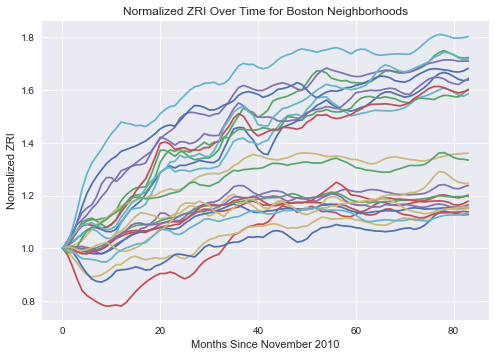

In [60]:
#plot time series
months = numpy.arange(0, len(timeSeries.columns))
for i in range(0, len(timeSeries.index)):
    pyplot.plot(months,
                timeSeries.iloc[i])
pyplot.title('Normalized ZRI Over Time for Boston Neighborhoods')
pyplot.xlabel('Months Since November 2010')
pyplot.ylabel('Normalized ZRI')
pyplot.show()

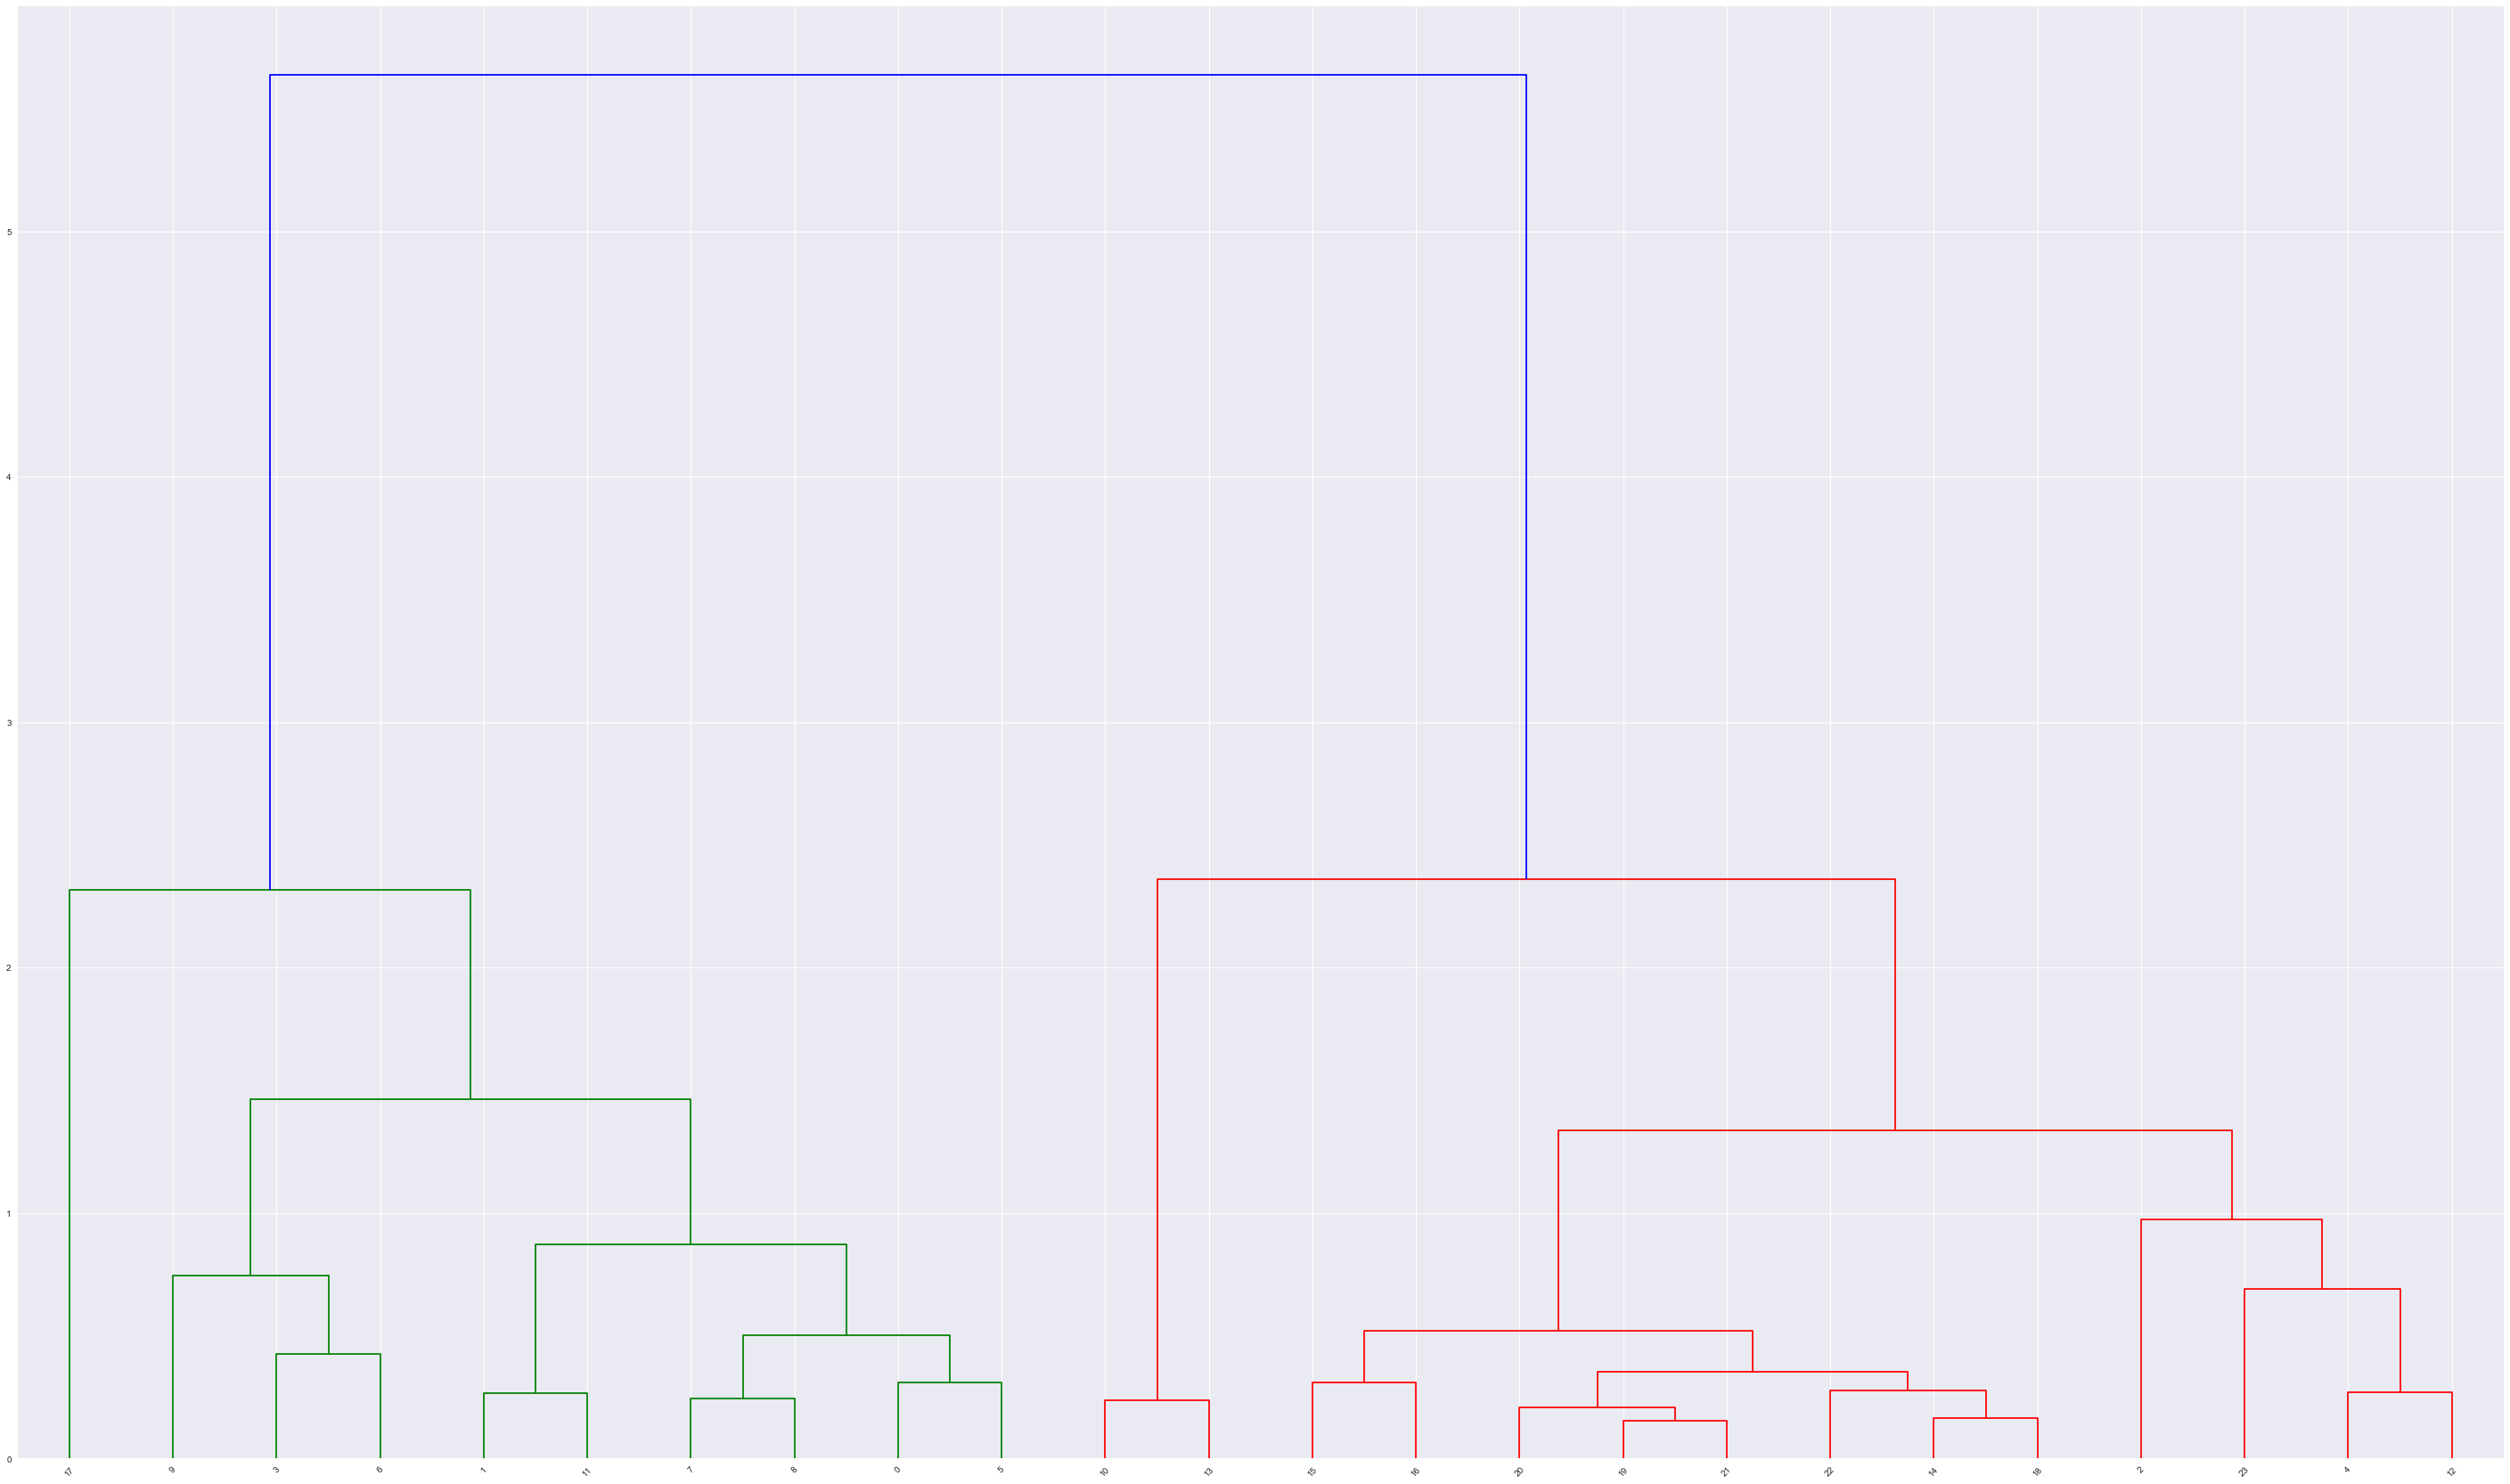

In [61]:
#hierarchical clustering
Z = hierarchy.linkage(numpy.array(timeSeries.as_matrix()), method='complete')
pyplot.figure(figsize=(50,30))
R = hierarchy.dendrogram(Z, p=10, truncate_mode='level')
pyplot.show()

In [62]:
#calculing k-means clusters
ss = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k,
                    init='k-means++',
                    max_iter=100,
                    n_init=10)
    kmeans.fit_predict(timeSeries)
    labels = kmeans.labels_
    ss.append(metrics.silhouette_score(timeSeries, kmeans.labels_, metric='euclidean'))

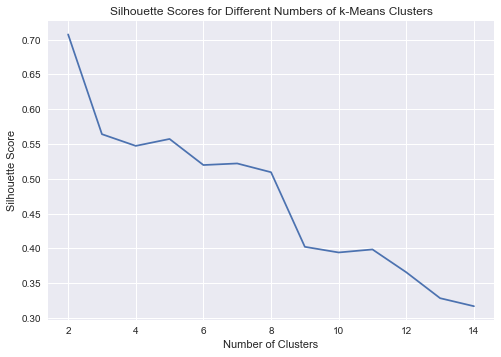

In [63]:
#plot silhouette score
pyplot.plot(range(2, 15), ss)
pyplot.title('Silhouette Scores for Different Numbers of k-Means Clusters')
pyplot.xlabel('Number of Clusters')
pyplot.ylabel('Silhouette Score')
pyplot.show()

In [64]:
#re-run for best k-means cluster value
k = 2
kmeans = KMeans(n_clusters=k,
                init='k-means++',
                max_iter=100,
                n_init=10)
kmeans.fit_predict(timeSeries)
labels = kmeans.labels_

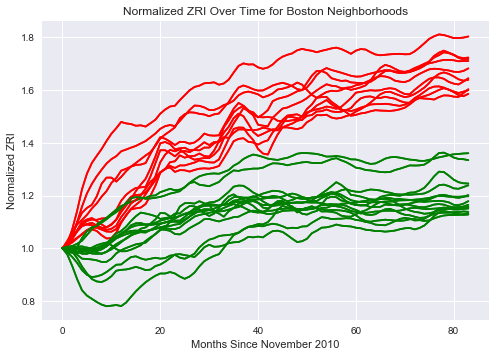

In [69]:
#plot time series with clusters
colors = ['red', 'green', 'blue', 'orange']
for i in range(0, len(timeSeries.index)):
    pyplot.plot(months,
                timeSeries.iloc[i],
                color=colors[labels[i]])
pyplot.title('Normalized ZRI Over Time for Boston Neighborhoods')
pyplot.xlabel('Months Since November 2010')
pyplot.ylabel('Normalized ZRI')
pyplot.savefig('C:/Development/CS506FinalProject/Normalized ZRI Over Time for Boston Neighborhoods.svg')
pyplot.show()

In [70]:
#dynamic time warping
def dtw(x, y):
    months = timeSeries.columns
    dist_matrix = numpy.zeros((len(x), len(x)))
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            dist_matrix[i, j] = numpy.sqrt((x[months[i]]-y[months[j]])**2)
    accum_dist_matrix = numpy.zeros((len(x), len(x)))
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            if i > 0 and j > 0:
                accum_dist_matrix[i, j] = dist_matrix[i, j] + min(accum_dist_matrix[i, j-1], accum_dist_matrix[i-1, j], accum_dist_matrix[i-1, j-1])
            elif i == 0 and j == 0:
                accum_dist_matrix[i, j] = dist_matrix[i, j]
            elif i == 0:
                accum_dist_matrix[i, j] = dist_matrix[i, j] + accum_dist_matrix[i, j-1]
            elif j == 0:
                accum_dist_matrix[i, j] = dist_matrix[i, j] + accum_dist_matrix[i-1, j]
    return accum_dist_matrix[len(x)-1, len(x)-1]

In [71]:
#define similariy matrix
similarity = numpy.zeros((len(timeSeries.index), len(timeSeries.index)))
for i in range(0, len(timeSeries.index)):
    i_user = timeSeries.iloc[i]
    for j in range(0, len(timeSeries.index)):
        j_user = timeSeries.iloc[j]
        similarity[i, j] = dtw(i_user, j_user)

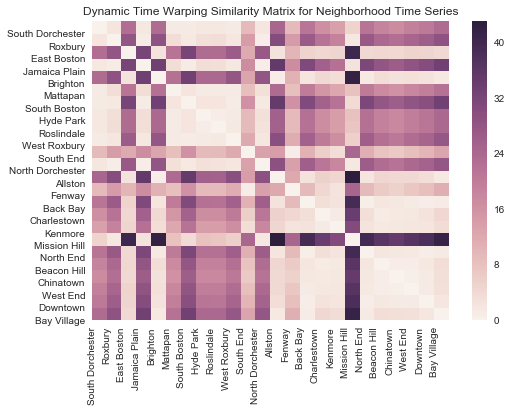

In [72]:
#make heatmap
regionIndex = numpy.arange(0, len(data.index))
heatmap(similarity)
pyplot.title('Dynamic Time Warping Similarity Matrix for Neighborhood Time Series')
pyplot.xticks(regionIndex, data['RegionName'], rotation=90)
pyplot.yticks(regionIndex, data['RegionName'][::-1], rotation=360)
pyplot.savefig('C:/Development/CS506FinalProject/Dynamic Time Warping Similarity Matrix for Neighborhood Time Series.svg')
pyplot.show()

In [73]:
#get similar / dissimilar users
mostSimilar = []
maxVal = 0.0
mostDissimilar = []
minVal = 10000.0
for i in range(0, len(timeSeries.index)):
    for j in range(0, len(timeSeries.index)):
        dist = similarity[i, j]
        if dist > maxVal:
            maxVal = dist
            mostDissimilar = [i, j]
        if dist < minVal and dist > 0:
            minVal = dist
            mostSimilar = [i, j]

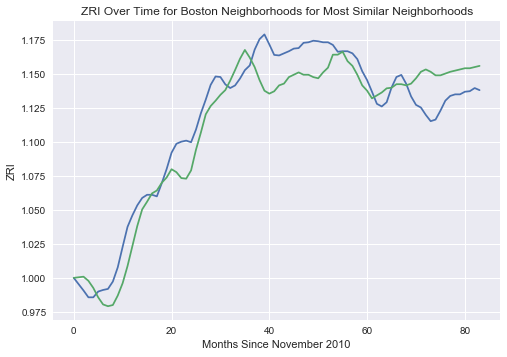

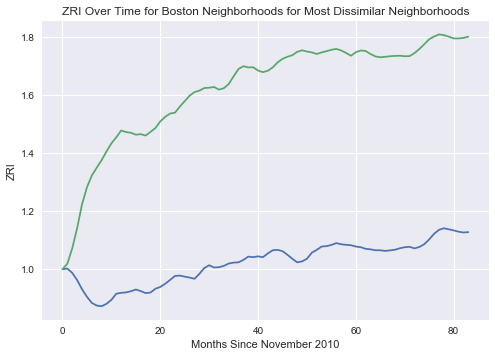

In [74]:
#plot most similar / dissimilar
pyplot.plot(months, timeSeries.iloc[mostSimilar[0]])
pyplot.plot(months, timeSeries.iloc[mostSimilar[1]])
pyplot.title('ZRI Over Time for Boston Neighborhoods for Most Similar Neighborhoods')
pyplot.xlabel('Months Since November 2010')
pyplot.ylabel('ZRI')
pyplot.show()

pyplot.plot(months, timeSeries.iloc[mostDissimilar[0]])
pyplot.plot(months, timeSeries.iloc[mostDissimilar[1]])
pyplot.title('ZRI Over Time for Boston Neighborhoods for Most Dissimilar Neighborhoods')
pyplot.xlabel('Months Since November 2010')
pyplot.ylabel('ZRI')
pyplot.show()

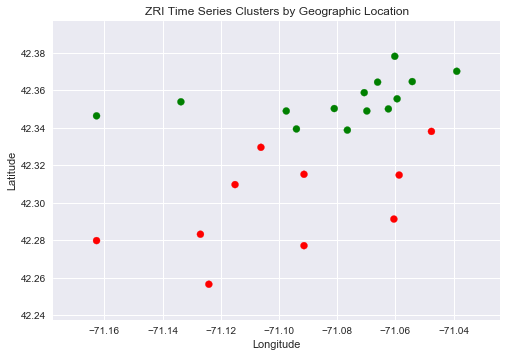

In [75]:
#plot by location
theseColors = []
for i in range(0, len(data.index)):
    theseColors.append(colors[labels[i]])
pyplot.scatter(-data['Longitude'],
               data['Latitude'],
               color=theseColors)
pyplot.title('ZRI Time Series Clusters by Geographic Location')
pyplot.xlabel('Longitude')
pyplot.ylabel('Latitude')
pyplot.show()

In [76]:
#get projected increase
months = timeSeries.columns
percentage = []
for i in range(0, len(timeSeries.index)):
    change = (timeSeries.iloc[i][months[-1]] - timeSeries.iloc[i][months[-13]])/timeSeries.iloc[i][months[-13]]
    percentage.append(change)
unNormTimeSeries['Percentage Change Over Last Year'] = percentage

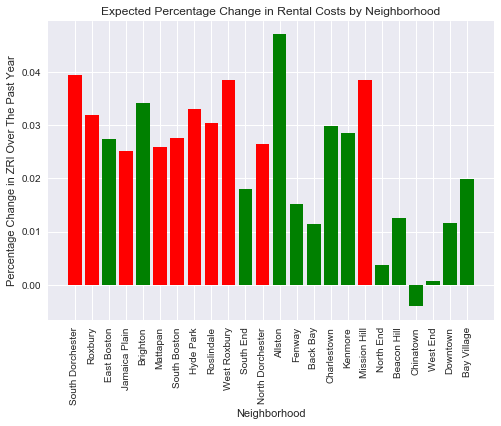

In [77]:
#plot projected percentage
pyplot.bar(regionIndex, percentage, color=theseColors)
pyplot.title('Expected Percentage Change in Rental Costs by Neighborhood')
pyplot.xlabel('Neighborhood')
pyplot.ylabel('Percentage Change in ZRI Over The Past Year')
pyplot.xticks(regionIndex, data['RegionName'], rotation=90)
pyplot.savefig('C:/Development/CS506FinalProject/Expected Percentage Change in Rental Costs by Neighborhood.svg')
pyplot.show()

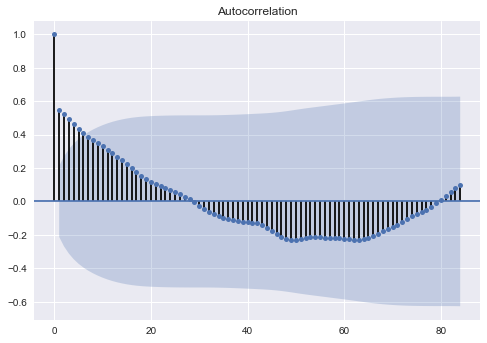

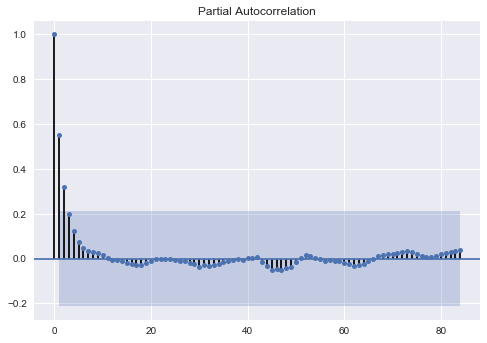

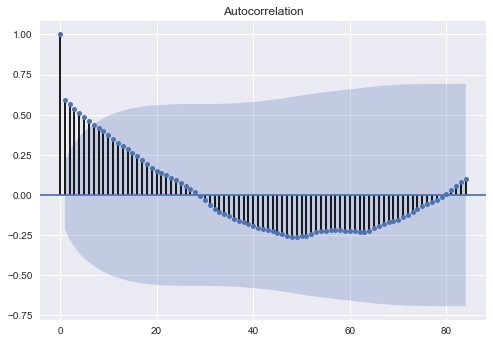

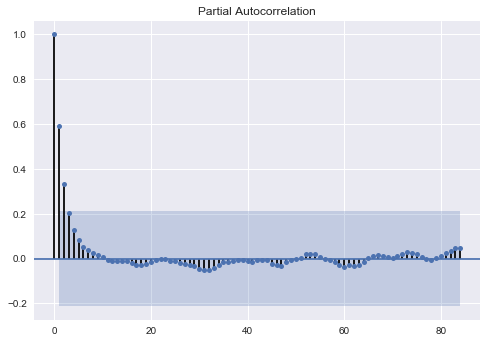

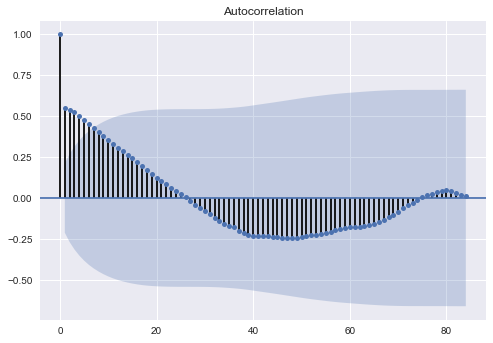

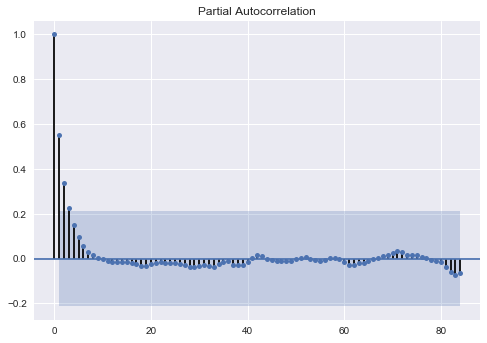

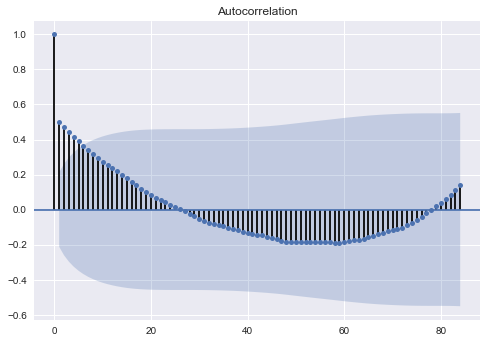

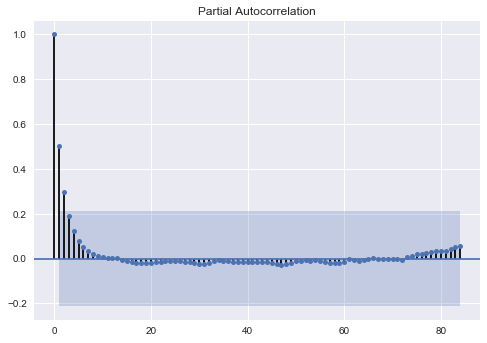

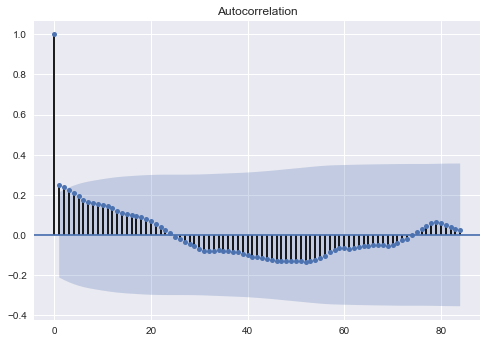

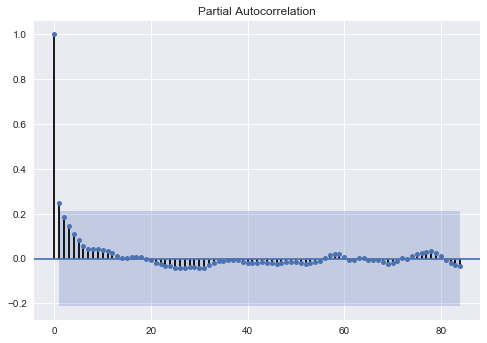

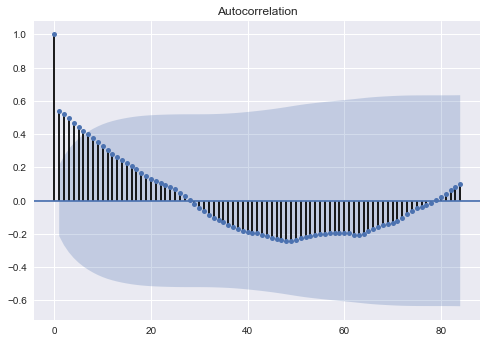

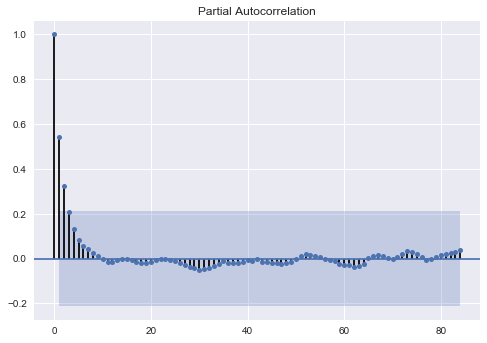

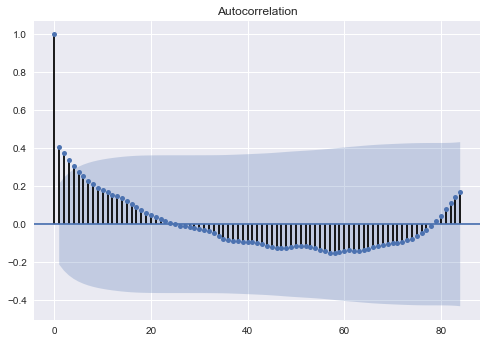

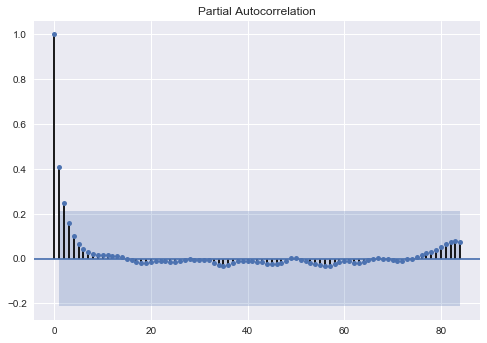

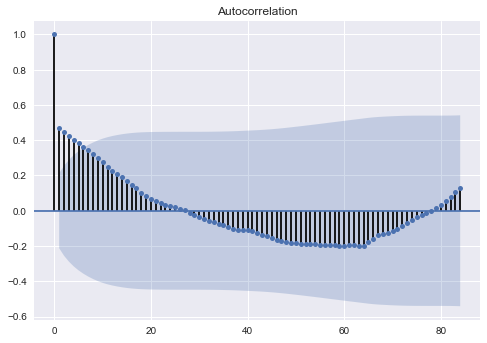

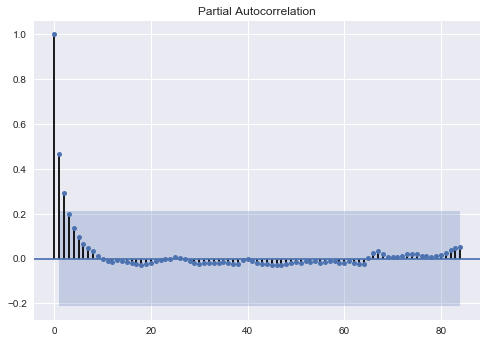

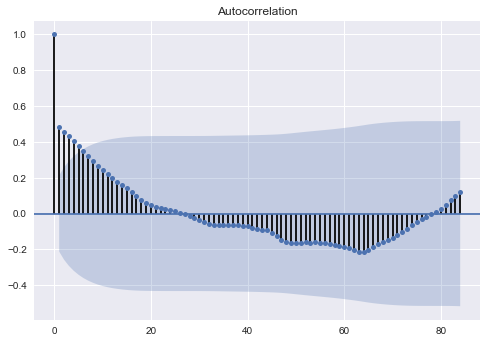

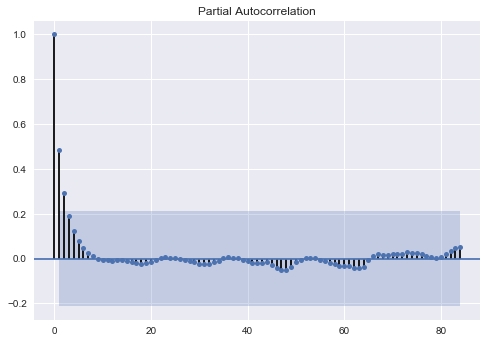

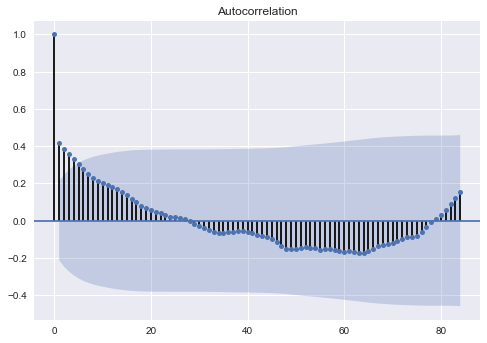

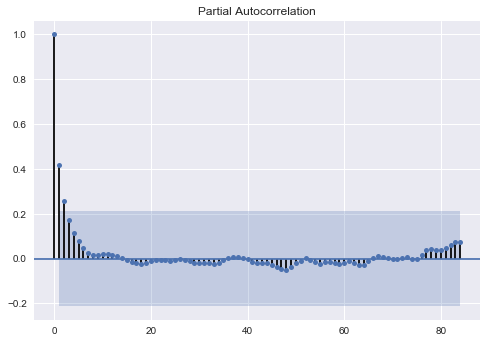

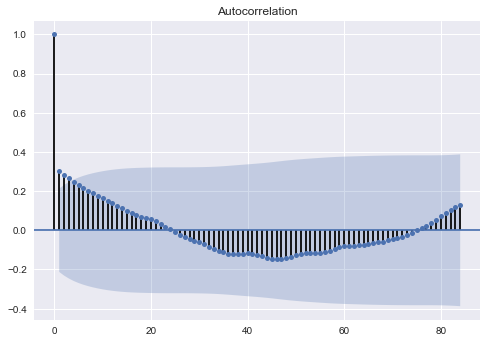

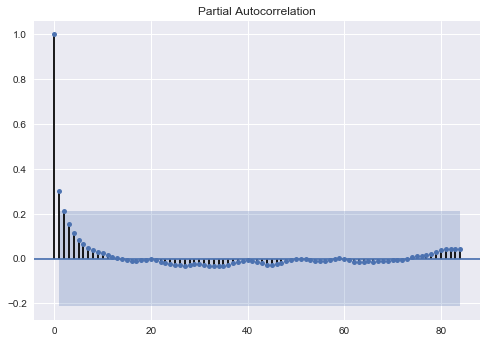

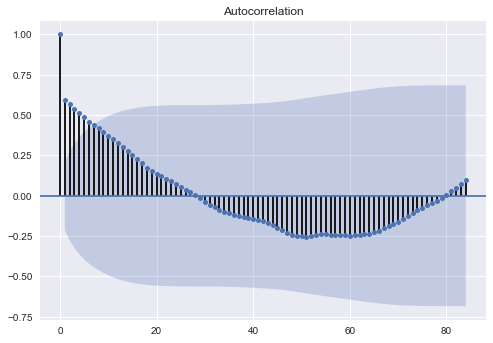

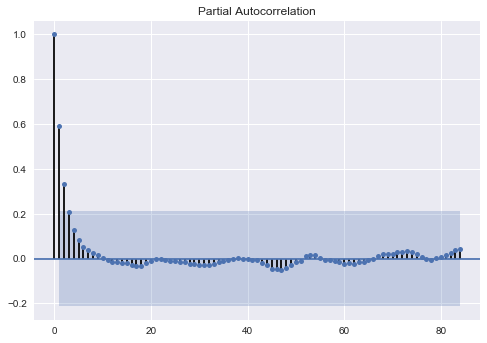

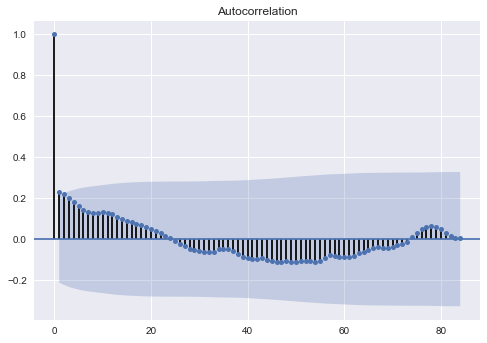

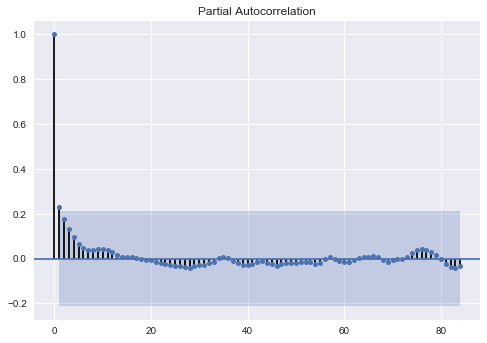

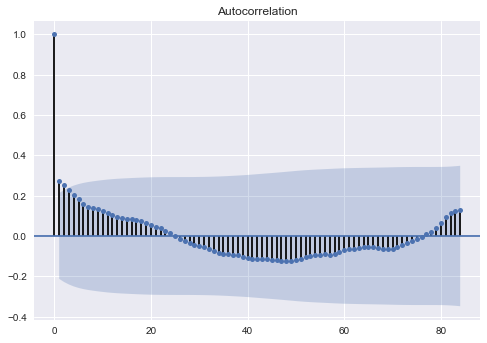

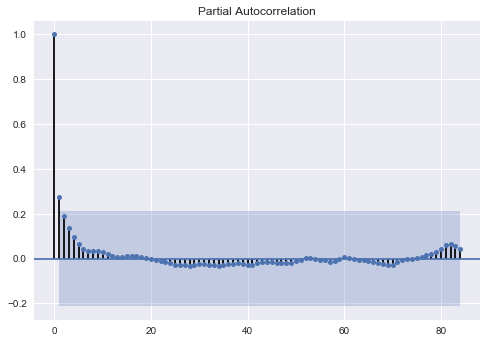

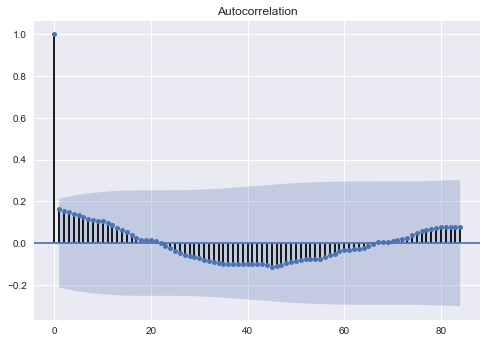

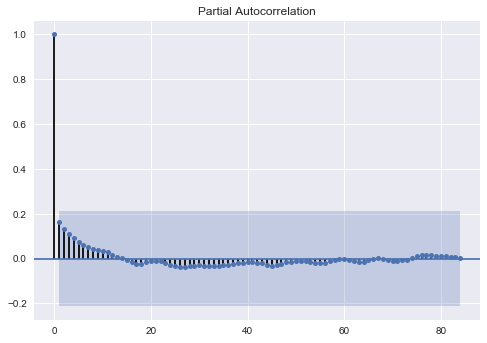

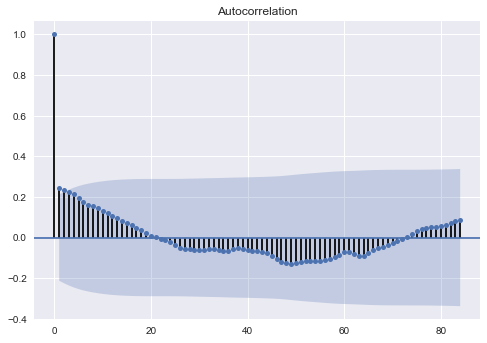

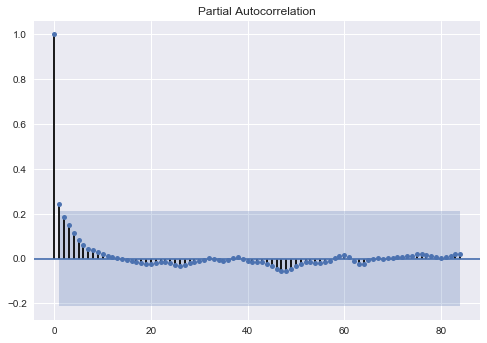

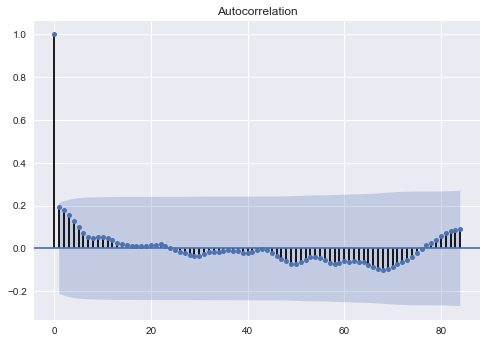

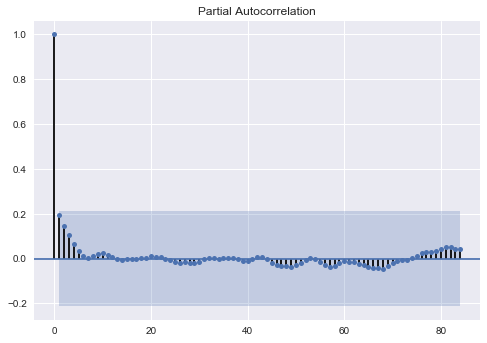

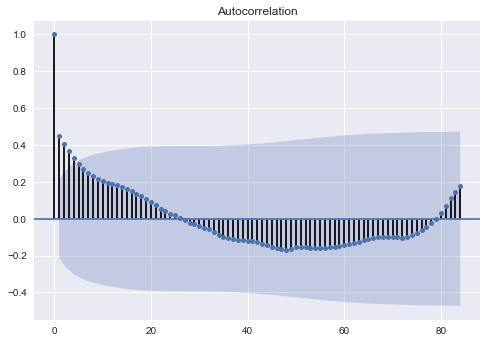

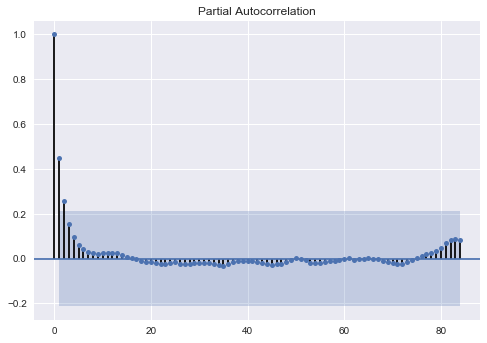

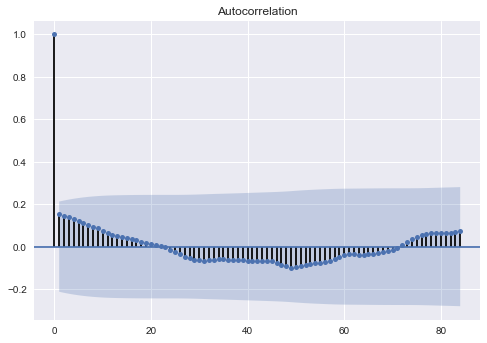

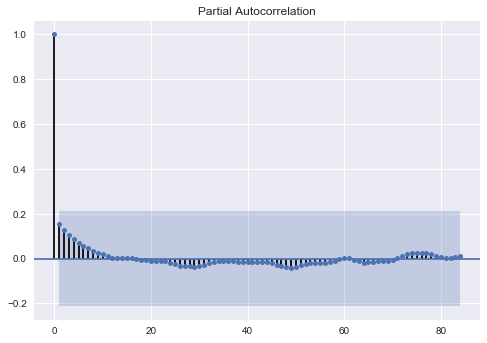

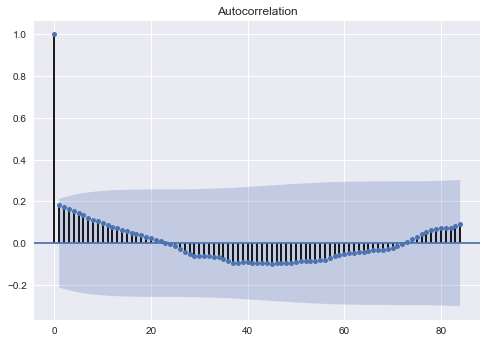

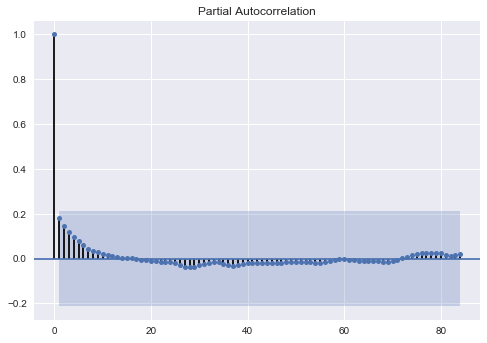

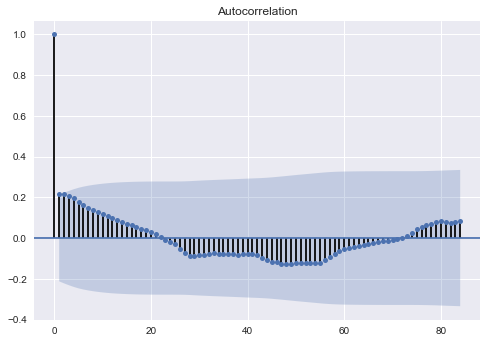

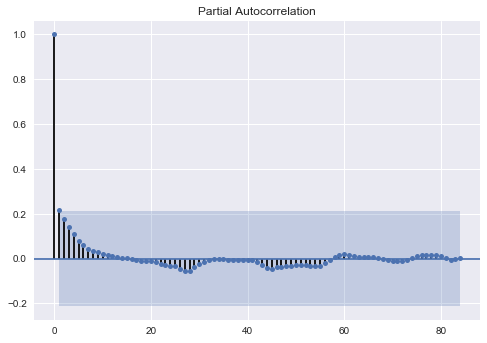

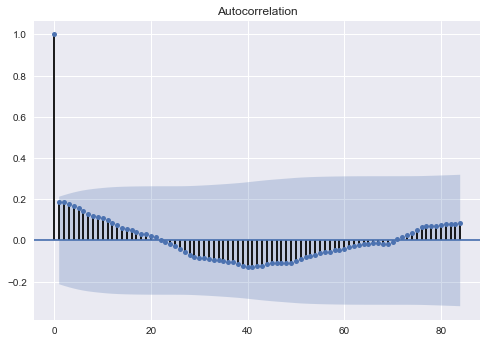

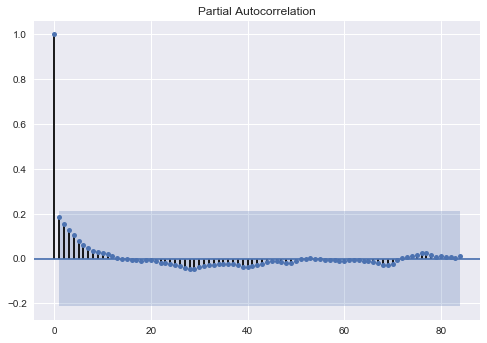

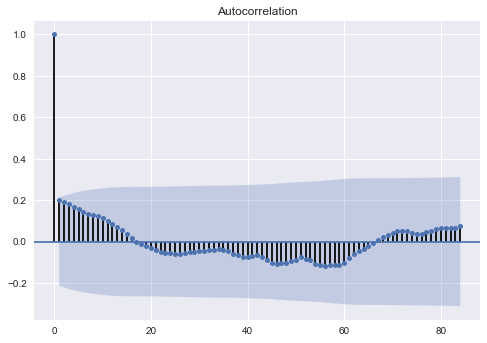

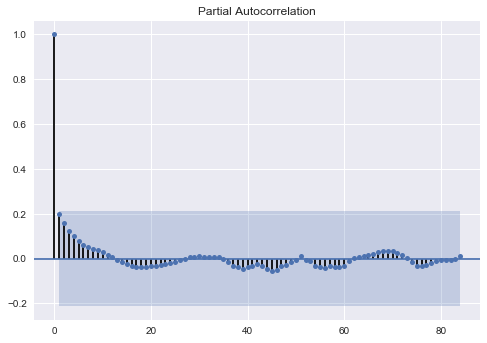

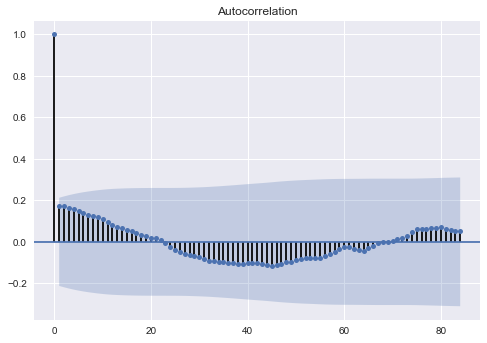

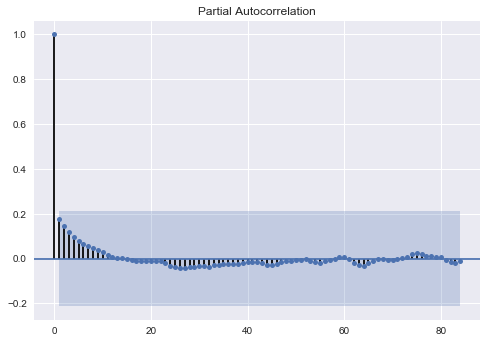

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
n = len(data.index)
for i in range(0, n):
    plot_acf(timeSeries.iloc[i])
    pyplot.show()
    plot_pacf(timeSeries.iloc[i])
    pyplot.show()

# Scraping Zillow Property by Property

In [1]:
#import libraries
import pandas
import requests
from bs4 import BeautifulSoup
import lxml

In [2]:
#get addresses
allProperties = pandas.read_csv('property-assessment-fy2017.csv')

C:\Users\StuBab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
#set URLs
baseURL = 'http://www.zillow.com/webservice/GetDeepSearchResults.htm?zws-id=X1-ZWz18viv1r9s0b_5cfwc'
addressURLStart = '&address='
cityStateURLStart = '&citystatezip='

In [18]:
#parse xml
def parseXML(response):
    xml = response.text.encode('utf-8')
    soup = BeautifulSoup(xml, 'lxml')
    return soup

In [20]:
#loop through
for i in range(0, len(allProperties['MAIL_ADDRESS'])):
    address = allProperties['MAIL_ADDRESS'][i]
    cityState = allProperties['MAIL CS'][i]
    addressURL = addressURLStart + address.replace(' ', '+')
    cityStateURL = cityStateURLStart + cityState.replace(' ', '+')
    response = requests.get(baseURL + addressURL + cityStateURL)
    test = parseXML(response)
    print(test)
    try:
        print(addressURL, test.findAll('latitude')[0].text)
    except:
        print('Not found.', addressURL)

<?xml version="1.0" encoding="utf-8"?><html><body><searchresults:searchresults xmlns:searchresults="http://www.zillow.com/static/xsd/SearchResults.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemalocation="http://www.zillow.com/static/xsd/SearchResults.xsd https://www.zillowstatic.com/vstatic/6ce354c/static/xsd/SearchResults.xsd"><request><address></address><citystatezip></citystatezip></request><message><text>Error: this account has reached is maximum number of calls for today</text><code>7</code></message></searchresults:searchresults><!-- H:012  T:82ms  S:150  R:Wed Nov 29 12:53:30 PST 2017  B:5.0.50267.8-hotfix_2017-11-28.3ecc3df~hotfix-platform-for-2017-11-28.4b0f42f --></body></html>
Not found. &address=195+LEXINGTON+ST


# Property Assessment Data 

In [11]:
#import libraries
import pandas
from statsmodels.regression import linear_model
from statsmodels.graphics.regressionplots import plot_fit
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

In [5]:
#get data
data = pandas.read_csv('property-assessment-fy2017.csv')

C:\Users\StuBab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#print data
data

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,0100001000_,NaN,0100001000_,104 A 104,PUTNAM,ST,NaN,02128_,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0100002000_,NaN,0100002000_,197,LEXINGTON,ST,NaN,02128_,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0100003000_,NaN,0100003000_,199,LEXINGTON,ST,NaN,02128_,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0100004000_,NaN,0100004000_,201,LEXINGTON,ST,NaN,02128_,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0100005000_,NaN,0100005000_,203,LEXINGTON,ST,NaN,02128_,104,R2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0100006000_,NaN,0100006000_,205 207,LEXINGTON,ST,NaN,02128_,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0100007000_,NaN,0100007000_,209 211,LEXINGTON,ST,NaN,02128_,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0100008000_,NaN,0100008000_,213,LEXINGTON,ST,NaN,02128_,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0100009000_,NaN,0100009000_,215,LEXINGTON,ST,NaN,02128_,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0401750010_,0401750000_,0401750000_,210,HEMENWAY,ST,2-B,02115_,102,CD,...,NaN,NaN,P,S,W,N,0.0,N,A,A


C:\Users\StuBab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\StuBab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


                            OLS Regression Results                            
Dep. Variable:                AV_BLDG   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     412.8
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           1.58e-91
Time:                        09:53:25   Log-Likelihood:            -1.4113e+06
No. Observations:               76246   AIC:                         2.823e+06
Df Residuals:                   76245   BIC:                         2.823e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
YR_REMOD     975.1903     47.998     20.317      0.0

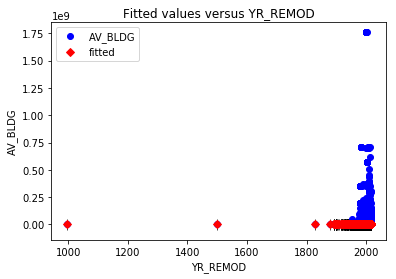

In [25]:
#create linear model
smallData = data[['AV_BLDG', 'YR_REMOD']]
smallData.replace(0, numpy.nan, inplace=True)
smallData.dropna(inplace=True)
model = linear_model.OLS(smallData['AV_BLDG'], smallData['YR_REMOD'])
results = model.fit()
print(results.summary())
plot_fit(results, 'YR_REMOD')

In [22]:
smallData

,AV_BLDG,UNIT_NUM,ZIPCODE,YR_REMOD
9,331300.0,2-B,02115_,1984.0
10,294200.0,2-C,02115_,1984.0
11,304600.0,3-A,02115_,1984.0
12,331300.0,3-B,02115_,1984.0
13,284900.0,3-C,02115_,1984.0
29,762900.0,1,02115_,1985.0
30,335000.0,2,02115_,1985.0
31,243900.0,3,02115_,1985.0
32,349400.0,4,02115_,1985.0
33,496500.0,5,02115_,2003.0
